<a href="https://colab.research.google.com/github/ashu6196/Weed_Detection/blob/main/weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  assert not isinstance(image,type(None)), 'image not found'
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Agriculture  'Colab Notebooks'  'Getting started.pdf'


In [ ]:
!ls /mydrive/Agriculture

backup	       crop_weed_detection.ipynb  obj.data   test
crop_weed.cfg  generate_train.py	  obj.names


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutosh987","key":"f18244f27d2c79f2a024d6fac222bde8"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-12 08:10:45            281  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            258  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            357  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays TFRecords                         11GB  2021-03-09 04:49:23             57  
nickuzmenkov/ranzcr-clip-kfold-tfrecords                    RANZCR CLiP KFol

In [ ]:
!kaggle datasets download -d ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes

 97% 77.0M/79.2M [00:00<00:00, 65.2MB/s]
100% 79.2M/79.2M [00:00<00:00, 125MB/s] 


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!unzip ../crop-and-weed-detection-data-with-bounding-boxes.zip -d data/

Archive:  ../crop-and-weed-detection-data-with-bounding-boxes.zip
  inflating: data/agri_data/data/agri_0_1009.jpeg  
  inflating: data/agri_data/data/agri_0_1009.txt  
  inflating: data/agri_data/data/agri_0_1017.jpeg  
  inflating: data/agri_data/data/agri_0_1017.txt  
  inflating: data/agri_data/data/agri_0_1018.jpeg  
  inflating: data/agri_data/data/agri_0_1018.txt  
  inflating: data/agri_data/data/agri_0_1020.jpeg  
  inflating: data/agri_data/data/agri_0_1020.txt  
  inflating: data/agri_data/data/agri_0_1024.jpeg  
  inflating: data/agri_data/data/agri_0_1024.txt  
  inflating: data/agri_data/data/agri_0_1026.jpeg  
  inflating: data/agri_data/data/agri_0_1026.txt  
  inflating: data/agri_data/data/agri_0_1028.jpeg  
  inflating: data/agri_data/data/agri_0_1028.txt  
  inflating: data/agri_data/data/agri_0_1041.jpeg  
  inflating: data/agri_data/data/agri_0_1041.txt  
  inflating: data/agri_data/data/agri_0_1053.jpeg  
  inflating: data/agri_data/data/agri_0_1053.txt  
  infla

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Agriculture/crop_weed.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Agriculture/crop_weed.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Agriculture/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()

In [ ]:
!python generate_train.py

In [ ]:
!ls data/agri_data

data  train.txt


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-03-12 17:03:12--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-03-12 17:03:12--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  43.4MB/s    in 3.9s    

2021-03-12 17:03:16 (39.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# press ctrl+shift+i than paste below code 
# open console and paste below code else your runtime will crash after some time
'''
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
'''

'\nfunction ClickConnect(){\nconsole.log("Working"); \ndocument.querySelector("colab-toolbar-button#connect").click() \n}\nsetInterval(ClickConnect,60000)\n'

In [ ]:
# train your custom detector
!./darknet detector train /content/gdrive/MyDrive/Agriculture/obj.data /content/gdrive/MyDrive/Agriculture/crop_weed.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 187624, rewritten_bbox = 0.009594 % 

 3926: 0.378341, 0.345231 avg loss, 0.000010 rate, 7.085180 seconds, 125632 images, 0.228048 hours left
Loaded: 0.000035 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.864648), count: 1, class_loss = 0.164037, iou_loss = 0.066791, total_loss = 0.230828 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.798227), count: 9, class_loss = 3.220144, iou_loss = 0.779230, total_loss = 3.999374 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.004005, iou_loss = 0.000000, total_loss = 0.004005 
 total_bbox = 187634, rewritten_bbox = 0.009593 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.897756), count: 2, class_loss = 0.314363, iou_loss = 0.073127, total_loss = 0.387490 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1

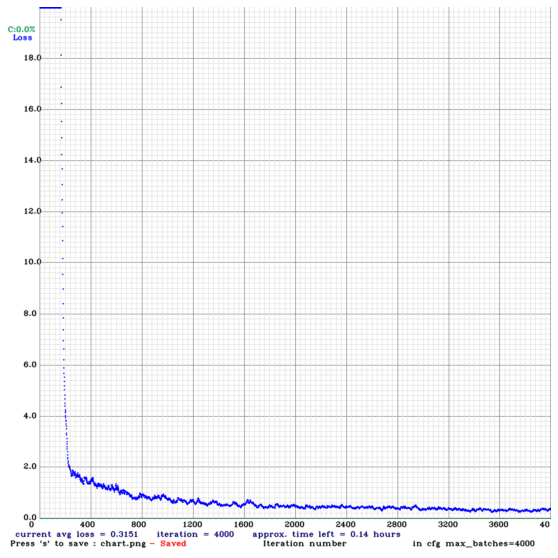

In [ ]:
imShow('chart.png')

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=32/batch=1/' crop_weed.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' crop_weed.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!ls /content/drive/MyDrive/Agriculture/test

crop_1.jpeg  crop_3.jpeg  weed_1.jpeg  weed_3.jpeg  weed_5.jpeg
crop_2.jpeg  crop_4.jpeg  weed_2.jpeg  weed_4.jpeg  weed_6.jpeg


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

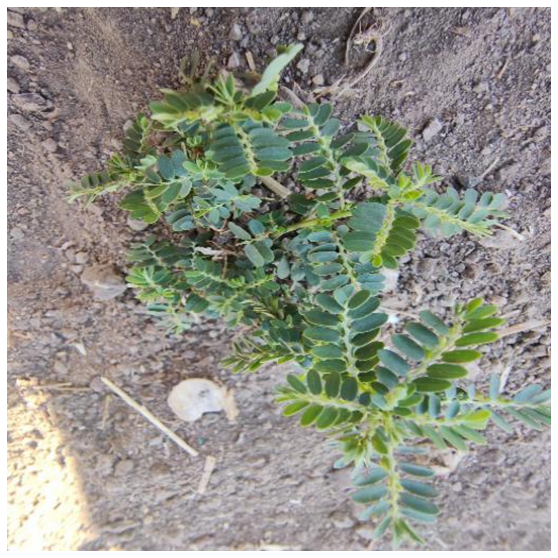

In [ ]:
!./darknet detector test /content/drive/MyDrive/Agriculture/obj.data /content/drive/MyDrive/Agriculture/crop_weed.cfg /content/drive/MyDrive/Agriculture/backup/crop_weed_final.weights /content/drive/MyDrive/Agriculture/test/weed_1.jpeg  -thresh 0.3
imShow('/content/drive/MyDrive/Agriculture/test/weed_1.jpeg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

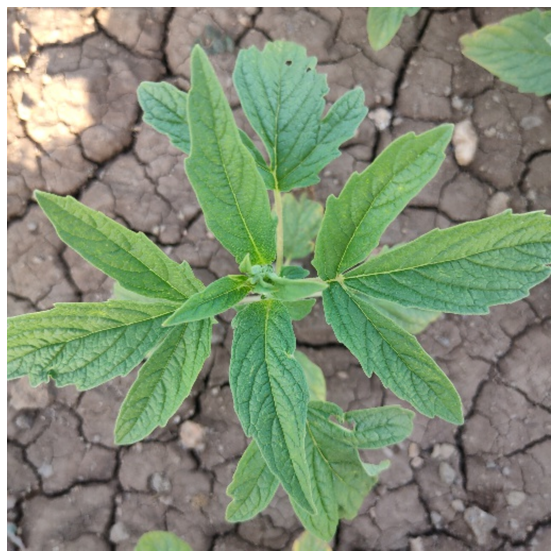

In [ ]:
!./darknet detector test /content/drive/MyDrive/Agriculture/obj.data /content/drive/MyDrive/Agriculture/crop_weed.cfg /content/drive/MyDrive/Agriculture/backup/crop_weed_final.weights /content/drive/MyDrive/Agriculture/test/crop_2.jpeg  -thresh 0.3
imShow('/content/drive/MyDrive/Agriculture/test/crop_2.jpeg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

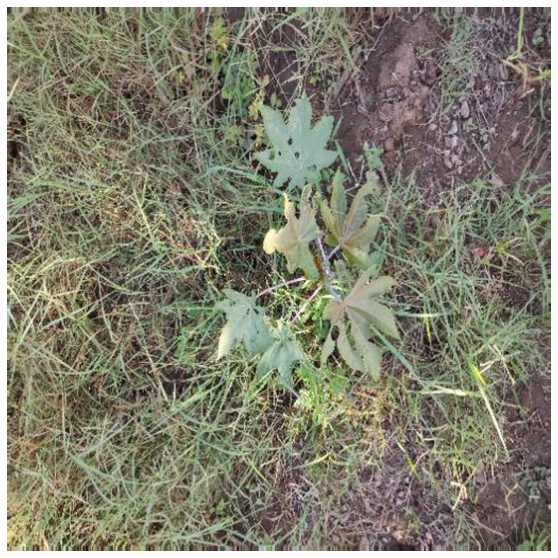

In [ ]:
!./darknet detector test /content/drive/MyDrive/Agriculture/obj.data /content/drive/MyDrive/Agriculture/crop_weed.cfg /content/drive/MyDrive/Agriculture/backup/crop_weed_final.weights /content/drive/MyDrive/Agriculture/test/weed_5.jpeg  -thresh 0.3
imShow('/content/drive/MyDrive/Agriculture/test/weed_5.jpeg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

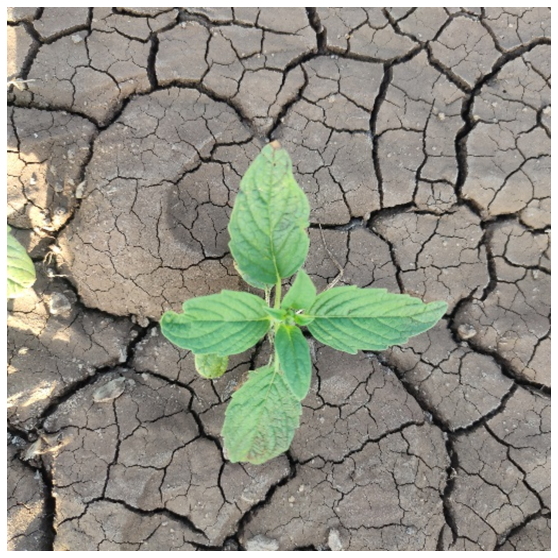

In [ ]:
!./darknet detector test /content/drive/MyDrive/Agriculture/obj.data /content/drive/MyDrive/Agriculture/crop_weed.cfg /content/drive/MyDrive/Agriculture/backup/crop_weed_final.weights /content/drive/MyDrive/Agriculture/test/crop_3.jpeg  -thresh 0.3
imShow('/content/drive/MyDrive/Agriculture/test/crop_3.jpeg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

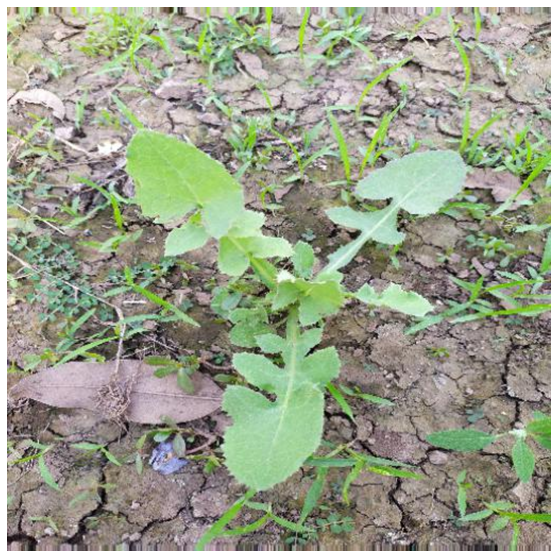

In [ ]:
!./darknet detector test /content/drive/MyDrive/Agriculture/obj.data /content/drive/MyDrive/Agriculture/crop_weed.cfg /content/drive/MyDrive/Agriculture/backup/crop_weed_final.weights /content/drive/MyDrive/Agriculture/test/weed_4.jpeg  -thresh 0.3
imShow('/content/drive/MyDrive/Agriculture/test/weed_4.jpeg')